In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform = transforms.ToTensor()) # Downloading the MNIST dataset from torchvision datasets.


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:
classes = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine') # Defining classes

#Visualizing the dataset with a sampleloader

In [0]:
sampleloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True) # creating a sample loader from trainset for visualization.

In [0]:
dataiter = iter(trainloader) # Iterating over the sample loader
images, labels = dataiter.next() # Getting one instance from the loader

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
0


In [0]:
# creating a function to show images

def imshow(img): 
  npimg = img.numpy()
  npimg = np.transpose(npimg, (1,2,0))
  plt.figure(figsize=(1,1))
  plt.imshow(np.squeeze(npimg))
  plt.show()

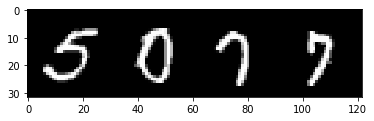

five        zero        seven        seven


In [0]:
# Using torchvision method called make_grids to show bunch of images along with their labels

imshow(torchvision.utils.make_grid(images))
print('        '.join(classes[labels[j]] for j in range(4)))

#Building Model

In [0]:
import torch.nn as nn
from torch import optim

In [0]:
class Mynet(nn.Module):
    def __init__(self): 
        super(Mynet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding=(2,2)),         # (N, 1, 28, 28) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
# Loading trainloader and testloader for training and evaluating

batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
# Evaluation Function

def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = Mynet() # creating instance of our Model

In [0]:
# Defing loss funtion and Optimizer

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

#Training

Epoch: 0/16, Test acc: 95.87, Train acc: 95.72
Epoch: 1/16, Test acc: 97.11, Train acc: 97.23
Epoch: 2/16, Test acc: 97.93, Train acc: 98.31
Epoch: 3/16, Test acc: 98.27, Train acc: 98.59
Epoch: 4/16, Test acc: 98.02, Train acc: 98.52
Epoch: 5/16, Test acc: 98.23, Train acc: 98.97
Epoch: 6/16, Test acc: 98.67, Train acc: 99.38
Epoch: 7/16, Test acc: 98.46, Train acc: 99.44
Epoch: 8/16, Test acc: 98.44, Train acc: 99.47
Epoch: 9/16, Test acc: 98.49, Train acc: 99.48
Epoch: 10/16, Test acc: 98.61, Train acc: 99.63
Epoch: 11/16, Test acc: 98.38, Train acc: 99.58
Epoch: 12/16, Test acc: 98.62, Train acc: 99.75
Epoch: 13/16, Test acc: 98.45, Train acc: 99.73
Epoch: 14/16, Test acc: 98.60, Train acc: 99.78
Epoch: 15/16, Test acc: 98.56, Train acc: 99.83


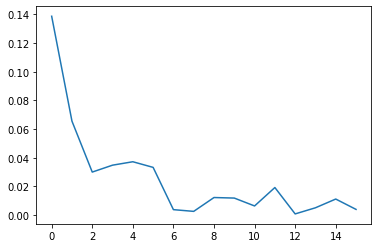

CPU times: user 9min 55s, sys: 6.96 s, total: 10min 2s
Wall time: 10min 4s


In [0]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

#Checking Predictions

In [0]:
out_img = net(images)

In [0]:
pred = torch.argmax(out_img, dim=1)

In [0]:
pred[1].item()

0

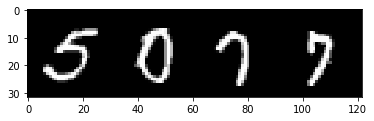

five        zero        seven        seven


In [0]:
imshow(torchvision.utils.make_grid(images))
print('        '.join(classes[pred[j].item()] for j in range(4)))